In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

# -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 

import pandas as pd
import numpy as np
#import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
pd.set_option("display.max_rows", 100)
pd.set_option("display.expand_frame_repr", True)
pd.set_option('display.width', 1000)
pd.set_option("display.max_colwidth", 100)

In [2]:
# USER DEFINED FUNCTIONS

## Function to print a header for cell outputs
def print_header(analysis, len_header=100):
    return print('\n'+'-'*int((len_header-len(analysis))/2),analysis,'-'*(int((len_header-len(analysis))/2)-1))



# WELCOMING THE DATA

## Importing the dataset (ofertas_relampago.csv)

In [3]:
# Let's store a original version of the dataset
df_orig = pd.read_csv('ofertas_relampago.csv')

df = df_orig.copy()
original_cols = df.columns.to_list()
df.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


## Data Types (dtypes)

In [4]:
print(f'The dataframe contains {df.shape[0]} rows (observations) and {df.shape[1]} columns (attributes) \n')
print_header('COLUMNS AND THEIR DATATYPES')
print(df.dtypes)
print('-'*100)
#print('DESCRIPTION OF THE NUMERICAL DATA:')
#df.describe()

The dataframe contains 48746 rows (observations) and 13 columns (attributes) 


------------------------------------ COLUMNS AND THEIR DATATYPES -----------------------------------
OFFER_START_DATE              object
OFFER_START_DTTM              object
OFFER_FINISH_DTTM             object
OFFER_TYPE                    object
INVOLVED_STOCK                 int64
REMAINING_STOCK_AFTER_END      int64
SOLD_AMOUNT                  float64
SOLD_QUANTITY                float64
ORIGIN                        object
SHIPPING_PAYMENT_TYPE         object
DOM_DOMAIN_AGG1               object
VERTICAL                      object
DOMAIN_ID                     object
dtype: object
----------------------------------------------------------------------------------------------------


In [5]:
num_cols = df.select_dtypes(include='number').columns.tolist()
str_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()
dt_cols = df.select_dtypes(include='datetimetz').columns.tolist()

# -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- -- 
print_header(f'NUMERIC COLUMNS: {len(num_cols)}')
if len(num_cols) > 0:
    for col in num_cols:
        print(f'- {col}: {df[col].dtype}')
    print('(num_cols list created with all numeric type columns\' names)')
else:
    print('- (No numeric columns)')

# -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- -- 

print_header(f'STRING COLUMNS: {len(str_cols)}')
if len(str_cols) > 0:
    for col in str_cols:
        print(f'- {col}: {df[col].dtype}')
    print('(str_cols list created with all string/object type columns\' names)')
else:
    print('- (No string columns)')

# -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- -- 

print_header(f'DATETIME COLUMNS: {len(dt_cols)}')
if len(dt_cols) > 0:
    for col in dt_cols:
        print(f'- {col}: {df[col].dtype}')
    print('(dt_cols list created with all datetime type columns\' names)')
else:
    print('- (No datetime columns)')

# -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- -- 

print_header(f'BOOLEAN COLUMNS: {len(bool_cols)}')
if len(bool_cols) > 0:
    for col in bool_cols:
        print(f'- {col}: {df[col].dtype}')
    print('(bool_cols list created with all boolean type columns\' names)')
else:
    print('- (No boolean columns)')

print('-'*100) 
# -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- --  -- -- 


----------------------------------------- NUMERIC COLUMNS: 4 ----------------------------------------
- INVOLVED_STOCK: int64
- REMAINING_STOCK_AFTER_END: int64
- SOLD_AMOUNT: float64
- SOLD_QUANTITY: float64
(num_cols list created with all numeric type columns' names)

----------------------------------------- STRING COLUMNS: 9 ----------------------------------------
- OFFER_START_DATE: object
- OFFER_START_DTTM: object
- OFFER_FINISH_DTTM: object
- OFFER_TYPE: object
- ORIGIN: object
- SHIPPING_PAYMENT_TYPE: object
- DOM_DOMAIN_AGG1: object
- VERTICAL: object
- DOMAIN_ID: object
(str_cols list created with all string/object type columns' names)

---------------------------------------- DATETIME COLUMNS: 0 ---------------------------------------
- (No datetime columns)

----------------------------------------- BOOLEAN COLUMNS: 0 ----------------------------------------
- (No boolean columns)
-------------------------------------------------------------------------------------------

## Data Quality & Missing Values

In [6]:
# DESCRIBING NUMERIC DATA
print_header('NUMERIC VARIABLES DESCRIPTION')
print(df.describe())


# MISSING DATA
print(f'total number of rows: {len(df):,}')
df_null_analysis = pd.DataFrame(df.isnull().sum()).reset_index().rename(columns={'index':'col_name', 0:'null_rows'})
df_null_analysis['null_rows_pct'] = (df_null_analysis['null_rows']/len(df)*100).round(1).astype(str)+'%'

print_header('NULL VALUES')
print(df_null_analysis)


----------------------------------- NUMERIC VARIABLES DESCRIPTION ----------------------------------
       INVOLVED_STOCK  REMAINING_STOCK_AFTER_END   SOLD_AMOUNT  SOLD_QUANTITY
count    48746.000000               48746.000000  24579.000000   24579.000000
mean        35.007508                  30.565216     51.208898      10.851052
std        206.761058                 195.813806    175.254414      45.475305
min          1.000000                -192.000000      0.280000       1.000000
25%          5.000000                   4.000000      5.730000       1.000000
50%         10.000000                   8.000000     12.420000       3.000000
75%         15.000000                  15.000000     30.925000       6.000000
max       9000.000000                8635.000000   4836.570000    1646.000000
total number of rows: 48,746

-------------------------------------------- NULL VALUES -------------------------------------------
                     col_name  null_rows null_rows_pct
0         

#### What can we extract from this summary?

**DTYPES**
- When importing the data, we can see that there are string columns that need to be converted to datetime format for further comparison and feature engineering.
- This variables are: `OFFER_START_DATE`, `OFFER_START_DTTM`, and `OFFER_FINISH_DTTM`

**DATA QUALITY**
- `INVOLVE_STOCK` seems to make logical sense, that is, it represents the number of available stock for an offer and it has a minimum value of 1 (there is no offer without stock).
- `REMAINING_STOCK_AFTER_END` which is the result of `INVOLVED_STOCK - SOLD_QUANTITY`, has a minimum value of `-192`, which I believe needs to be fixed. Sales should not exceed the stock available.
- `SOLD_QUANTITY`, as mentioned in the previous point, is used to calculate `REMAINING_STOCK_AFTER_END`, and in some cases `SOLD_QUANTITY > INVOLVE_STOCK`. We will fix it and use it to calculate a new `REMAINING_STOCK_AFTER_END`.
- `SOLD_AMOUNT`, which is a monetary representation of the sales, will need to be fixed as well once we have the fixed `SOLD_QUANTITY` and calculated unit price: `(SOLD_AMOUNT/SOLD_QUANTITY) * fixed_SOLD_QUANTITY`

**NULL VALUES**
- We have in this dataframe 3 columns with missing values.
- `SOLD_AMOUNT` and `SOLD_QUANTITY` missing values imply no sales at all for that observation. We will fill those missing values with the int `0` (zero).
- `ORIGIN` is a string variable that has close to 77% of the observations with missing values, and the rest with a the same value of `'A'`. We will analyse if there is any particularity for `'A'` observations, otherwise we will drop the column.

With that being said, we can start cleaning the data.

## CLEANING THE DATA

### DATA TYPES

As was mentioned before, we can see that there are some date and datetime columns that are currently in string (object) type.

To be able to make date and time comparissons we will need to convert them to datetime type.
- `OFFER_START_DATE` converted will be called `OFFER_START_DATE_dt`
- `OFFER_START_DTTM` converted will be called `OFFER_START_DTTM_dt`
- `OFFER_FINISH_DTTM` converted will be called `OFFER_FINISH_DTTM_dt`

In [7]:
df['OFFER_START_DATE_dt'] = pd.to_datetime(df['OFFER_START_DATE'])
df['OFFER_FINISH_DTTM_dt'] = pd.to_datetime(df['OFFER_FINISH_DTTM'])
df['OFFER_START_DTTM_dt'] = pd.to_datetime(df['OFFER_START_DTTM'])

cols_df = ['OFFER_START_DATE', 'OFFER_START_DATE_dt',
           'OFFER_START_DTTM', 'OFFER_START_DTTM_dt',
           'OFFER_FINISH_DTTM', 'OFFER_FINISH_DTTM_dt'
           ]

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print_header('OFFER_START_DATE description')
print(df[cols_df].describe())

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print_header('dtypes VALIDATION')

print(
    df[['OFFER_START_DATE', 'OFFER_START_DATE_dt',
        'OFFER_START_DTTM', 'OFFER_START_DTTM_dt',
        'OFFER_FINISH_DTTM', 'OFFER_FINISH_DTTM_dt'
        ]].dtypes
)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
print_header('CONTENT VALIDATION')
df[cols_df].head(2)


------------------------------------ OFFER_START_DATE description -----------------------------------
                 OFFER_START_DATE_dt
count                          48746
mean   2021-07-05 11:24:49.008328704
min              2021-06-01 00:00:00
25%              2021-06-22 00:00:00
50%              2021-07-07 00:00:00
75%              2021-07-21 00:00:00
max              2021-07-31 00:00:00

----------------------------------------- dtypes VALIDATION ----------------------------------------
OFFER_START_DATE                     object
OFFER_START_DATE_dt          datetime64[ns]
OFFER_START_DTTM                     object
OFFER_START_DTTM_dt     datetime64[ns, UTC]
OFFER_FINISH_DTTM                    object
OFFER_FINISH_DTTM_dt    datetime64[ns, UTC]
dtype: object

----------------------------------------- CONTENT VALIDATION ----------------------------------------


,OFFER_START_DATE,OFFER_START_DATE_dt,OFFER_START_DTTM,OFFER_START_DTTM_dt,OFFER_FINISH_DTTM,OFFER_FINISH_DTTM_dt
0,2021-06-22,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,2021-06-22 23:02:43+00:00
1,2021-06-22,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,2021-06-22 19:00:02+00:00


#### DATA QUALITY
Fixing `SOLD_QUANTITY` and `SOLD_AMOUNT`

In [8]:
'''
We will fill na for the columns that we can interpret, SOLD_AMOUNT and SOLD_QUANTITY, 
which we can assume that: if missing, then 0.
'''
df['SOLD_AMOUNT'].fillna(0,inplace=True)
df['SOLD_QUANTITY'].fillna(0,inplace=True)


# -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
'''
Now, let's fix the data, considering that there are some records that show more sales than there is stock.
We will create three new features:
- 'sold_quantity_fixed' as a fixed version of 'SOLD_QUANTITY'
- 'remaining_stock_after_end_fixed' as a fixed version of 'REMAINING_STOCK_AFTER_END'
- 'sold_amount_fixed' as a fixed version of 'SOLD_AMOUNT'
'''

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 'sold_quantity_fixed'
'''
We will start by fixing 'SOLD_QUANTITY'. If 'SOLD_QUANTITY' > 'INVOLVED_STOCK' then 'INVOLVED_STOCK' else 'SOLD_QUANTITY'.
We shall start with creating a function to then apply it to our df and create the fixed column
'''

def sold_qty_fixer(stock,sales):
    if sales > stock:
        return stock
    else:
        return sales

df['sold_quantity_fixed'] = (df.apply(lambda x: sold_qty_fixer(x.INVOLVED_STOCK, x.SOLD_QUANTITY), axis=1)).astype(int)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 'remaining_stock_after_end_fixed'
''' 
Now we can fix the 'REMAINING_STOCK_AFTER_END' column, by subtracting the new 'sold_quantity_fixed' from the 'INVOLVED_STOCK'
'''

df['remaining_stock_after_end_fixed'] = (df['INVOLVED_STOCK']-df['sold_quantity_fixed']).astype(int)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# 'sold_amount_fixed'
'''
Finally, we will fix the 'SOLD_AMOUNT' column by dividing it by the previous/wrong 'SOLD_QUANTITY' 
and multiplying this unit price by the new/fixed 'sold_quantity_fixed'
(Here I am assuming that the SOLD_AMOUNT reflects the SOLD_QUANTITY times unit price, which I cannot validate with the given data)
'''
df['unit_price'] = (df['SOLD_AMOUNT']/df['SOLD_QUANTITY']).fillna(0)
df['sold_amount_fixed'] = df['unit_price']*df['sold_quantity_fixed']
df['sold_amount_fixed'].fillna(0, inplace=True)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

# -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
'''
For validation purposes, we will now print the data and make sure that the changes were correcly applied.
'''

cols_df = ['INVOLVED_STOCK', 
           'SOLD_QUANTITY', 'sold_quantity_fixed',
           'SOLD_AMOUNT', 'sold_amount_fixed',
           'REMAINING_STOCK_AFTER_END', 'remaining_stock_after_end_fixed',
           'unit_price'
           ]

print_header('VALIDATION: Fixed variables')
df[cols_df].head()


------------------------------------ VALIDATION: Fixed variables -----------------------------------


,INVOLVED_STOCK,SOLD_QUANTITY,sold_quantity_fixed,SOLD_AMOUNT,sold_amount_fixed,REMAINING_STOCK_AFTER_END,remaining_stock_after_end_fixed,unit_price
0,4,6.0,4,4.72,3.146667,-2,0,0.786667
1,5,0.0,0,0.00,0.000000,5,5,0.000000
2,15,3.0,3,10.73,10.730000,12,12,3.576667
3,15,2.0,2,7.03,7.030000,13,13,3.515000
4,15,15.0,15,39.65,39.650000,0,0,2.643333


Now that we have the sales and stock data making sense, we can create a feature that would represent 'success'.
This will help us:
- capture irrelevance in the data.
- understande the relationship between each variable and our definition of 'success'.
- find patterns and opportunitites in our analyses.

In [9]:
# FEATURE ENGINEERING ('SUCCESS' feature)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
# sales_rate: Percentage of the INVOLVED_STOCK that was sold (INVOLVED_STOCK/sold_quantity_fixed).
'''
Observing the data, it would be interesting to understand the relationship between our features (independent variables) and some
rate of success (dependent variable).
In this case we could create a new column containing the rate of SALES/STOCK. We will have a percentage of the INVOLVED_STOCK
that was actually sold (SOLD_QUANTITY).
Considering that we have cleaned the data, we can now execute this logic and create this feature of interest quite simply.
'''

df['sales_rate'] = df['sold_quantity_fixed']/df['INVOLVED_STOCK']

cols_df = ['INVOLVED_STOCK', 
           'sold_quantity_fixed',
           'sales_rate', # <------------
           'sold_amount_fixed',
           'remaining_stock_after_end_fixed',
           'unit_price'
           ]

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
'''
Now, we are ready to understand the relationship between the different variables available and our definition of 'success' ('sales_rate').

ALERT! We must keep in mind that the percentage of sales could be, and probably is, biased by the duration of the offer,
that is, offers that stay active for longer have more chances of materializing into more sales than those that 
stay active for shorter periods of time.
With that being said, we will start by observing the relationship between offer duration and sales_rate.
'''

print_header("Definition of 'SUCCESS' feature validation")
df[cols_df+['sales_rate']].head()


----------------------------- Definition of 'SUCCESS' feature validation ----------------------------


,INVOLVED_STOCK,sold_quantity_fixed,sales_rate,sold_amount_fixed,remaining_stock_after_end_fixed,unit_price,sales_rate
0,4,4,1.000000,3.146667,0,0.786667,1.000000
1,5,0,0.000000,0.000000,5,0.000000,0.000000
2,15,3,0.200000,10.730000,12,3.576667,0.200000
3,15,2,0.133333,7.030000,13,3.515000,0.133333
4,15,15,1.000000,39.650000,0,2.643333,1.000000


### MISSING VALUES
We have already filled the missing values for the `SOLD_QUANTITY` and `SOLD_AMOUNT`.

With the creation of the `sales_rate` and the fixed `sold_quantity_fixed` features we can evaluate if the `ORIGIN` is relevant at all for our analyses.

In [10]:
# We will create a copy of the df with the columns we are interested in and fill na temporarily with an arbitrary value (string 'NA')
df_origin_temp = df[['ORIGIN','INVOLVED_STOCK','sales_rate','sold_quantity_fixed', 'unit_price']].copy()
df_origin_temp['ORIGIN'].fillna('NA', inplace=True)

print_header('WHOLE DATASET')
print(df_origin_temp.describe())

print_header("ORIGIN='A' DATASET")
print(df_origin_temp[df_origin_temp['ORIGIN']=='A'].describe())

print_header("ORIGIN='NA' DATASET")
print(df_origin_temp[df_origin_temp['ORIGIN']=='NA'].describe())


------------------------------------------- WHOLE DATASET ------------------------------------------
       INVOLVED_STOCK    sales_rate  sold_quantity_fixed    unit_price
count    48746.000000  48746.000000         48746.000000  48746.000000
mean        35.007508      0.197131             5.254031      4.457664
std        206.761058      0.305654            31.272233     16.486230
min          1.000000      0.000000             0.000000      0.000000
25%          5.000000      0.000000             0.000000      0.000000
50%         10.000000      0.010000             1.000000      0.638150
75%         15.000000      0.250000             3.000000      4.032083
max       9000.000000      1.000000          1646.000000    639.070000

----------------------------------------- ORIGIN='A' DATASET ----------------------------------------
       INVOLVED_STOCK    sales_rate  sold_quantity_fixed    unit_price
count    11316.000000  11316.000000         11316.000000  11316.000000
mean       118

In [11]:
print_header("SALES, STOCK, PRICE per ORIGIN")
df_origin_temp.groupby('ORIGIN').agg(num_offers=('ORIGIN','count'),
                                     # -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
                                     avg_stock=('INVOLVED_STOCK', 'mean'),
                                     min_stock=('INVOLVED_STOCK', 'min'),
                                     max_stock=('INVOLVED_STOCK', 'max'),
                                     # -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
                                     avg_unit_price=('unit_price', 'mean'),
                                     min_unit_price=('unit_price', 'min'),
                                     max_unit_price=('unit_price', 'max'),
                                     # -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
                                     avg_sales_rate=('sales_rate','mean'),
                                     avg_sold_qty=('sold_quantity_fixed','mean')
                                     # -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- 
                                     ).round(2)


----------------------------------- SALES, STOCK, PRICE per ORIGIN ----------------------------------


,num_offers,avg_stock,min_stock,max_stock,avg_unit_price,min_unit_price,max_unit_price,avg_sales_rate,avg_sold_qty
ORIGIN,,,,,,,,,
A,11316,118.38,1,9000,8.08,0.0,639.07,0.13,15.93
NA,37430,9.80,5,15,3.36,0.0,496.73,0.22,2.03


number of observations with INVOLVED_STOCK <= 100	 = 	 46,785
number of observations with INVOLVED_STOCK > 100	 = 	 1,961


,INVOLVED_STOCK,sales_rate,sold_quantity_fixed,unit_price
count,48746.000000,48746.000000,48746.000000,48746.000000
mean,35.007508,0.197131,5.254031,4.457664
std,206.761058,0.305654,31.272233,16.486230
min,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,10.000000,0.010000,1.000000,0.638150
75%,15.000000,0.250000,3.000000,4.032083
max,9000.000000,1.000000,1646.000000,639.070000


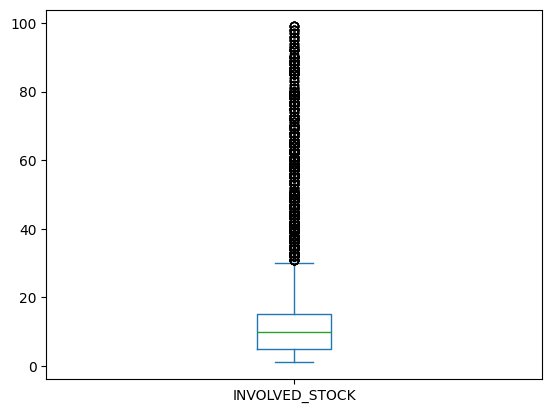

In [12]:
threshold = 100
var = 'INVOLVED_STOCK'


print(f'number of observations with {var} <= {threshold}\t = \t {df_origin_temp[df_origin_temp[var]<=threshold][var].count():,}')

print(f'number of observations with {var} > {threshold}\t = \t {df_origin_temp[df_origin_temp[var]>threshold][var].count():,}')


df_origin_temp[df_origin_temp[var]<threshold][var].plot(kind='box')

df_origin_temp.describe()

In [ ]:
threshold = np.inf
var = 'INVOLVED_STOCK'

df_origin_temp.head()

df_origin_temp_pvt = df_origin_temp[df_origin_temp[var]<=threshold].pivot(values=var, columns='ORIGIN')

df_origin_temp_pvt['FULL DF'] = df_origin_temp_pvt['A'].fillna(0)+df_origin_temp_pvt['NA'].fillna(0)
df_origin_temp_pvt = df_origin_temp_pvt[['FULL DF', 'A', 'NA']].rename(columns={'A':'ORIGIN=A', 'NA':'ORIGIN=NA'})

df_origin_temp_pvt.plot(kind='box')
plt.title(f'{var} per ORIGIN boxplot distribution\n({var}<={threshold})')
# plt.xlabel('ORIGIN')
plt.ylabel(var)
plt.ylim([0,
          round((int(df_origin_temp.describe().loc['75%',var])+int(df_origin_temp.describe().loc['std',var]*1)),-2)
          #round((int(df_origin_temp.describe().loc['mean',var])+int(df_origin_temp.describe().loc['std',var]*3)),-2)
          ])

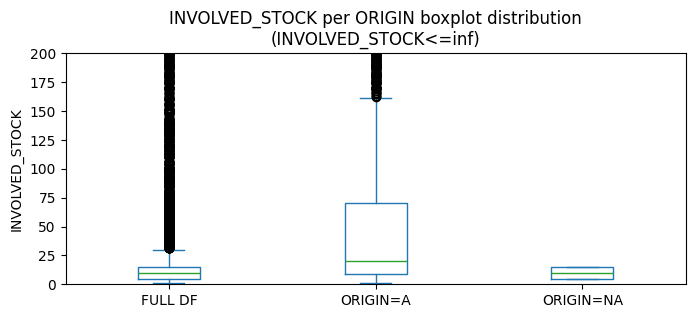

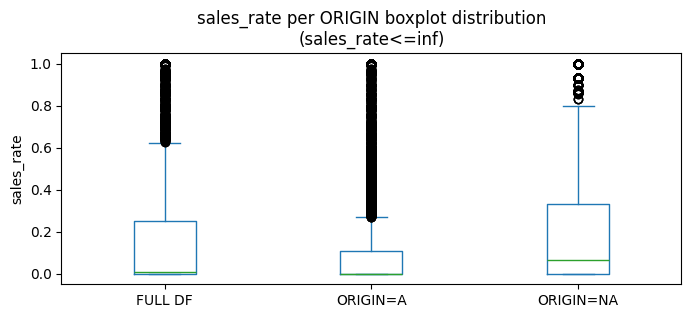

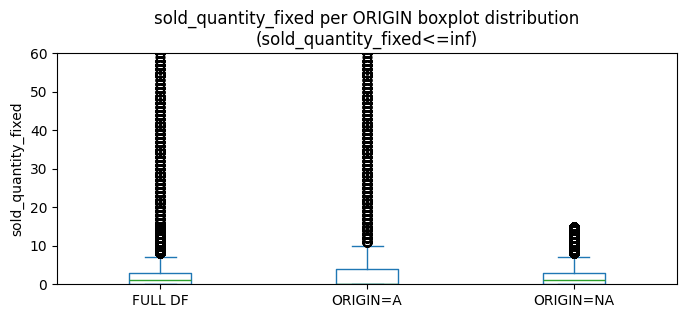

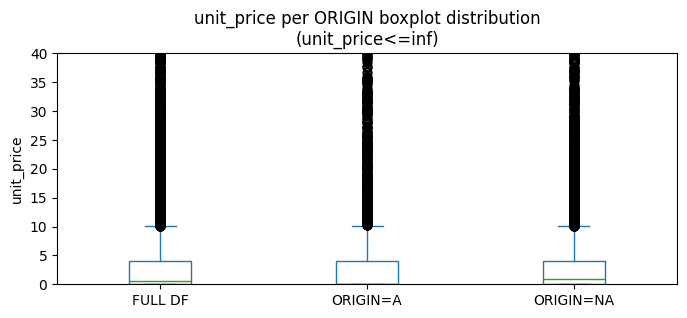

In [13]:

def relative_boxplot_ORIGIN(var, threshold=np.inf):

    df_origin_temp.head()

    df_origin_temp_pvt = df_origin_temp[df_origin_temp[var]<=threshold].pivot(values=var, columns='ORIGIN')

    df_origin_temp_pvt['FULL DF'] = df_origin_temp_pvt['A'].fillna(0)+df_origin_temp_pvt['NA'].fillna(0)
    df_origin_temp_pvt = df_origin_temp_pvt[['FULL DF', 'A', 'NA']].rename(columns={'A':'ORIGIN=A', 'NA':'ORIGIN=NA'})

    df_origin_temp_pvt.plot(kind='box', figsize=(8,3))
    plt.title(f'{var} per ORIGIN boxplot distribution\n({var}<={threshold})')
    # plt.xlabel('ORIGIN')
    plt.ylabel(var)
    if int(df_origin_temp[var].max()) <= 1:
        pass
    elif (int(df_origin_temp.describe().loc['75%',var])+int(df_origin_temp.describe().loc['std',var]*1)) <= 99:
        plt.ylim([0,
                round((int(df_origin_temp.describe().loc['75%',var])+int(df_origin_temp.describe().loc['std',var]*2)),-1)
                #round((int(df_origin_temp.describe().loc['mean',var])+int(df_origin_temp.describe().loc['std',var]*3)),-2)
                ])
    else:
        plt.ylim([0,
                round((int(df_origin_temp.describe().loc['75%',var])+int(df_origin_temp.describe().loc['std',var]*1)),-2)
                #round((int(df_origin_temp.describe().loc['mean',var])+int(df_origin_temp.describe().loc['std',var]*3)),-2)
                ])

vars = df_origin_temp.columns[1:].tolist()
# ['INVOLVED_STOCK', 'sales_rate', 'sold_quantity_fixed', 'unit_price']
# print(vars)



#relative_boxplot_ORIGIN(var='sold_quantity_fixed')
#df_origin_temp[['sold_quantity_fixed']].describe()


for var in vars: 
    relative_boxplot_ORIGIN(var=var)

#for var in vars:
#    df_origin_temp_pvt = df_origin_temp[df_origin_temp[var]<=threshold].pivot(values=var, columns='ORIGIN')
#
#    df_origin_temp_pvt['FULL DF'] = df_origin_temp_pvt['A'].fillna(0)+df_origin_temp_pvt['NA'].fillna(0)
#    df_origin_temp_pvt = df_origin_temp_pvt[['FULL DF', 'A', 'NA']].rename(columns={'A':'ORIGIN=A', 'NA':'ORIGIN=NA'})
#
#    df_origin_temp_pvt.plot(kind='box')
#    plt.title(f'{var} per ORIGIN boxplot distribution\n({var}<={threshold})')
#    # plt.xlabel('ORIGIN')
#    plt.ylabel(var)

### 'ORIGIN' COLUMN CONCLUSIONS

abcde

### WELCOMING THE DATA: PRELIMINARY CONCLUSIONS

abcdef

# Feature Analysis

## Datetime columns and their values

### Datetime columns analysis

We will understand now if there are any weird values in the datetime columns

We will also understand how the data is distributed through time

In [ ]:
print('OFFER_START_DATE')
print(f"- Oldest 'Offer Start Date': {min(df["OFFER_START_DTTM_dt"].dt.date)}")
print(f"- Most recent 'Offer Start Date': {max(df["OFFER_START_DTTM_dt"].dt.date)}")
print('-'*100)
print('OFFER_FINISH_DTTM')
print(f"- Oldest 'Offer End Date': {min(df["OFFER_FINISH_DTTM_dt"].dt.date)}")
print(f"- Most recent 'Offer End Date': {max(df["OFFER_FINISH_DTTM_dt"].dt.date)}")


In [ ]:
'''Let's plot the number of offers per offer start date to see if there is any concentration in a specific date'''
df_ts_temp = df[['OFFER_START_DATE_dt']].reset_index().groupby('OFFER_START_DATE_dt').agg(num_offers=('index','count')).copy()

import datetime as dt

plt.figure(figsize=(12,5))
plt.plot(df_ts_temp, marker='.')

plt.yticks(range(0,round(max(df_ts_temp['num_offers']),-2)+200,100))
plt.ylabel('Number of Offers')
plt.axhline(np.mean(df_ts_temp['num_offers']), ls='--', c='darkturquoise', label=f'average number of offers per day = {int(np.mean(df_ts_temp['num_offers']))}')

plt.xticks([df_ts_temp.reset_index()['OFFER_START_DATE_dt'][i] for i in range(0,len(df_ts_temp),5)],rotation=60)
plt.xlabel('Offer Start Date')
plt.axvline(dt.date(2021,7,1), ls=':', c='gray')

plt.legend()

plt.show()

#df_ts_temp.

We can visually confirm that all offers have started between the 2021-06-01 and 2021-07-31

In [ ]:
df_ts = df.copy()

df_ts['offer_duration_seconds'] = (df_ts['OFFER_FINISH_DTTM_dt']-df_ts['OFFER_START_DTTM_dt']).dt.total_seconds().astype(int)

# Let's remove the records for which offer durition = 0, for they are irrelevant for our analysis
print(f'lenght of the df BEFORE duration=0 removal: {len(df_ts)}')
#df_ts = df_ts[df_ts['offer_duration_seconds']>0]
print(f'lenght of the df AFTER duration=0 removal: {len(df_ts)}')

df_ts.columns

df_ts.isnull().sum()

We start seeing sales for offer durations (in seconds) starting at around 300 seconds (5 minutes).

This could indicate that any offer with a duration less than 300 seconds (5 minutes) could be disconsidered for it does not perform in sales.

### Feature Engineering (Date columns)

Let's try to find out more about these offers 'oferta relâmpago" and how long they last

#### Offer Duration

In [ ]:
df['offer_duration'] = (df['OFFER_FINISH_DTTM_dt']-df['OFFER_START_DTTM_dt'])
df['offer_duration_seconds'] = (df['OFFER_FINISH_DTTM_dt']-df['OFFER_START_DTTM_dt']).dt.total_seconds().astype(int)
df['offer_duration_minutes'] = (df['OFFER_FINISH_DTTM_dt']-df['OFFER_START_DTTM_dt']).dt.total_seconds().astype(int)//60
df['offer_duration_hours'] = (df['OFFER_FINISH_DTTM_dt']-df['OFFER_START_DTTM_dt']).dt.total_seconds().astype(int)//60//60
df['offer_duration_days'] = (df['OFFER_FINISH_DTTM_dt']-df['OFFER_START_DTTM_dt']).dt.total_seconds().astype(int)//60//60//24

df[['OFFER_START_DTTM','OFFER_FINISH_DTTM', 'offer_duration', 'offer_duration_seconds', 'offer_duration_minutes', 'offer_duration_hours','offer_duration_days']]

In [ ]:
def print_elapsed(elapsed):
    if elapsed < 60:
        magnitude = 'seconds'
        print(elapsed, 
            magnitude)
    elif elapsed <= 60**2:
        magnitude = 'minutes'
        print(elapsed//60, 
            magnitude if elapsed//60 != 1 else magnitude[:-1], ',', 
            elapsed%60, 
            'seconds' if elapsed%60 != 1 else 'second')
    elif elapsed < 60**2*24:
        magnitude = 'hours'
        print(elapsed//(60**2),
            magnitude if elapsed//(60**2) != 1 else magnitude[:-1], ',', 
            (elapsed%(60**2))//60, 
            'minutes,' if (elapsed%(60**2))//60 != 1 else 'minute,',
            (elapsed%(60**2))%60, 
            'seconds' if (elapsed%(60**2))%60 != 1 else 'second')
    elif elapsed < 60**2*24*7:
        magnitude = 'days'
        print(elapsed//(60**2*24), 
            magnitude if elapsed//(60**2*24) != 1 else magnitude[:-1], ',',
            (elapsed%(60**2*24))//(60**2), 
            'hours,' if (elapsed%(60**2*24))//(60**2) != 1 else 'hour,',
            ((elapsed%(60**2*24))%(60**2))//60, 
            'minutes,' if ((elapsed%(60**2*24))%(60**2))//60 != 1 else 'minute,',
            ((elapsed%(60**2*24))%(60**2))%60, 
            'seconds' if ((elapsed%(60**2*24))%(60**2))%60 != 1 else 'second')
    else: 
        magnitude = 'weeks'
        print(elapsed//(60**2*24*7), 
            magnitude if elapsed//(60**2*24*7) != 1 else magnitude[:-1], ',',
            (elapsed%(60**2*24*7))//(60**2*24), 
            'days,' if (elapsed%(60**2*24*7))//(60**2*24) != 1 else 'day,',
            ((elapsed%(60**2*24*7))%(60**2*24))//(60**2), 
            'hours,' if ((elapsed%(60**2*24*7))%(60**2*24))//(60**2) != 1 else 'hour,',
            (((elapsed%(60**2*24*7))%(60**2*24))%(60**2))//60, 
            'minutes,' if (((elapsed%(60**2*24*7))%(60**2*24))%(60**2))//60 != 1 else 'minute,',
            ((((elapsed%(60**2*24*7))%(60**2*24))%(60**2))%60)%60, 
            'seconds' if ((((elapsed%(60**2*24*7))%(60**2*24))%(60**2))%60)%60 != 1 else 'second')



In [ ]:
from scipy.stats import mode
def new_mode(a):
    return mode(a)[0]

print('-'*100)
for op in [min, max, np.mean, np.median, new_mode, np.var, np.std]:
    print(f'{op.__name__.upper().replace('NEW_','')} offer duration:')
    print(f'{int(op(df['offer_duration_seconds'])):,} seconds')
    print_elapsed(op(df['offer_duration_seconds']))       
    print('-'*100)

In [ ]:
bins = list(range(-1,24))+[max(df['offer_duration_hours'])]

df_duration = df.copy()
df_duration['offer_duration_hours_bins'] = pd.cut(df_duration['offer_duration_hours'], bins=bins, right=True)
#df_duration['offer_duration_hours_bin_num'] = pd.cut(df_duration['offer_duration_hours'], bins=bins, right=True, retbins=True)
df_duration.reset_index(inplace=True)
df_duration.rename(columns={'index':'offer_id'}, inplace=True)

df_duration_grp = df_duration[['offer_id','offer_duration_hours_bins']].groupby('offer_duration_hours_bins').agg(num_offers=('offer_id','nunique')).reset_index()

plt.figure(figsize=(12,5))
sns.barplot(x='offer_duration_hours_bins', y='num_offers', data=df_duration_grp[['offer_duration_hours_bins','num_offers']])
plt.xticks(rotation=90)
plt.show()



In [ ]:
df_duration_grp['pct_offers'] = df_duration_grp['num_offers']/len(df_duration)

df_duration_grp.sort_values('pct_offers', ascending=False).head(5)

In [ ]:
df_grp = df[['offer_duration_seconds', 
                   'sales_rate', 
                   'sold_quantity_fixed'
                   ]].groupby('offer_duration_seconds'
                             ).agg(avg_sales_rate=('sales_rate','mean'),
                                   avg_sales_qty=('sold_quantity_fixed','mean')
                                   )


fig, ax1 = plt.subplots(figsize=(12,5))
ax1.set_title('Sales Quantity & Sales/Stock Rate Per Offer Duration (in seconds)')
ax1.bar(x=df_grp[['avg_sales_qty']].reset_index()['offer_duration_seconds'].iloc[:100], 
        height=df_grp[['avg_sales_qty']].reset_index()['avg_sales_qty'].iloc[:100],
        width=8,
        color='limegreen')
ax1.set_xlabel('Offer Duration (in seconds)')
ax1.set_ylabel('Average QUANTITY of Sales')
ax1.yaxis.label.set_color('limegreen')
ax1.tick_params(axis='y', colors='limegreen')
ax1.set_yticks(range(0, int(df_grp['avg_sales_qty'].iloc[:100].max())+2,2))
ax1.set_xticks(range(0, round(int(df_grp[['avg_sales_qty']].reset_index()['offer_duration_seconds'].iloc[:100].max()),-2)+100,50))
#ax1.axvline(300, c='gray', ls=':', label='We start seeing sales for offer durations (in seconds) \n starting at around 300 seconds (5 minutes)')
ax1.set_xlim(xmin=0)

ax2 = ax1.twinx()

ax2.plot(df_grp['avg_sales_rate'].iloc[:100], '--', marker='.', c='#1f77b4')
ax2.set_ylabel('Average Sales RATE (SALES/STOCK)')
ax2.yaxis.label.set_color('#1f77b4')
ax2.tick_params(axis='y', colors='#1f77b4')

#fig.legend(loc='best', fontsize='small')


- We can see that there is a big concentration in the interval (5,6], meaning that most offers (62.4%) stayed active for more than 5 hours and up to 6 hours.
- The second biggest concentration of offers per duration is in the interval (7,8], that is, 15.8% of all offers stayed active for more than 7 hours and up to 8 hours.

#### Data Validation

Now we will validate some information to make sure the data is logically sound

In [ ]:
# 0 seconds duration validation
df_no_duration_offers = df[df['offer_duration_seconds']==0]

''' Offers that had no duration at all should have no SOLD_AMOUNT'''
print(f'{df_no_duration_offers.SOLD_AMOUNT.sum()} sold amount for offers with 0 sec. duration')
print(f'{df_no_duration_offers.SOLD_QUANTITY.sum()} sold quantity for offers with 0 sec. duration')



df_no_duration_offers.head()

In [ ]:
df.iloc[:,:-8].head()

## Numeric Columns and their values

In [ ]:
df_orig.describe()

## Categorical Variables and their values

In [ ]:
df_orig.dtypes

In [ ]:
categ_vars = ['ORIGIN', 'SHIPPING_PAYMENT_TYPE', 'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']

for categ in categ_vars:
    print(categ.upper())
    for val in df_orig[categ].unique():
        print(f'- {val}')
    print('-'*50)
